## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.


GitHub Repo Link Below
https://github.com/zimzam22/titanic12/tree/main

Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic = pd.read_csv("D:\\Assignment\\CPSC_4800\\titanic.csv")

In [122]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [123]:
titanic['Pclass'] = titanic['Pclass'].astype('category')
titanic['Survived'] = titanic['Survived'].astype('category')
titanic['Embarked'] = titanic['Embarked'].astype('category')
titanic['Sex'] = titanic['Sex'].astype('category')

In [116]:
missing_values = titanic.isnull().sum()

# Display the missing values
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [117]:
# For Age, fill missing values with the mean
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

# For Cabin, fill missing values with the mode (most frequent value)
titanic['Cabin'] = titanic['Cabin'].fillna(titanic['Cabin'].mode()[0])

# For Embarked, fill missing values with the mode (most frequent value)
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [118]:
missing_values = titanic.isnull().sum()

# Display the missing values
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [119]:
# Summary statistics for numerical columns
summary = titanic.describe()

# Display the summary
print("Summary Statistics for Numerical Columns:")
print(summary)

Summary Statistics for Numerical Columns:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [128]:
# Include both numeric and categorical columns in the summary
summary = titanic.describe()

# Print the summary
print(summary)

       PassengerId         Age       SibSp       Parch        Fare
count   891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000   29.699118    0.523008    0.381594   32.204208
std     257.353842   14.526497    1.102743    0.806057   49.693429
min       1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000   20.125000    0.000000    0.000000    7.910400
50%     446.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000   38.000000    1.000000    0.000000   31.000000
max     891.000000   80.000000    8.000000    6.000000  512.329200


In [132]:
sex_summary = titanic['Sex'].value_counts()
survived_summary = titanic['Survived'].value_counts()
pclass_summary = titanic['Pclass'].value_counts()
embarked_summary = titanic['Embarked'].value_counts()
# Print the summary
print(sex_summary)
print(survived_summary)
print(pclass_summary)
print(embarked_summary)

Sex
male      577
female    314
Name: count, dtype: int64
Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [133]:
# Create the 'Age Group' column if not already created
age_bins = [0, 12, 18, 30, 40, 50, 60, 100]
age_labels = ['0-12', '13-18', '19-30', '31-40', '41-50', '51-60', '60+']
titanic['Age Group'] = pd.cut(titanic['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the number of people in each age group
age_group_counts = titanic['Age Group'].value_counts().sort_index()

# Display the result
print(age_group_counts)

Age Group
0-12      68
13-18     45
19-30    271
31-40    167
41-50     89
51-60     48
60+       26
Name: count, dtype: int64


In [134]:
# Ensure 'Survived' is of numeric type (in case it's not)
titanic['Survived'] = titanic['Survived'].astype(float)

# 1. Calculate Survival Rate Based on Pclass
# Ensure 'Pclass' is treated as a categorical or object type
titanic['Pclass'] = titanic['Pclass'].astype(str)
survival_rate_by_class = titanic.groupby('Pclass', observed=False)['Survived'].mean().reset_index()
survival_rate_by_class.rename(columns={'Survived': 'survival_rate'}, inplace=True)

# 2. Calculate Survival Rate Based on Gender (Sex)
# Ensure 'Sex' is treated as a categorical or object type
survival_rate_by_gender = titanic.groupby('Sex', observed=False)['Survived'].mean().reset_index()
survival_rate_by_gender.rename(columns={'Survived': 'survival_rate'}, inplace=True)

# 3. Calculate Survival Rate Based on Age (using bins for age groups)
# Define bins for age groups (you can adjust these bins as needed)
age_bins = [0, 12, 18, 30, 40, 50, 60, 100]
age_labels = ['0-12', '13-18', '19-30', '31-40', '41-50', '51-60', '60+']

# Create an 'Age Group' column
titanic['Age Group'] = pd.cut(titanic['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate survival rate based on the age group
survival_rate_by_age = titanic.groupby('Age Group', observed=False)['Survived'].mean().reset_index()
survival_rate_by_age.rename(columns={'Survived': 'survival_rate'}, inplace=True)

# Display the results
print("Survival Rate by Pclass:")
print(survival_rate_by_class)

print("\nSurvival Rate by Gender (Sex):")
print(survival_rate_by_gender)

print("\nSurvival Rate by Age Group:")
print(survival_rate_by_age)

Survival Rate by Pclass:
  Pclass  survival_rate
0      1       0.629630
1      2       0.472826
2      3       0.242363

Survival Rate by Gender (Sex):
      Sex  survival_rate
0  female       0.742038
1    male       0.188908

Survival Rate by Age Group:
  Age Group  survival_rate
0      0-12       0.573529
1     13-18       0.488889
2     19-30       0.350554
3     31-40       0.437126
4     41-50       0.382022
5     51-60       0.416667
6       60+       0.269231


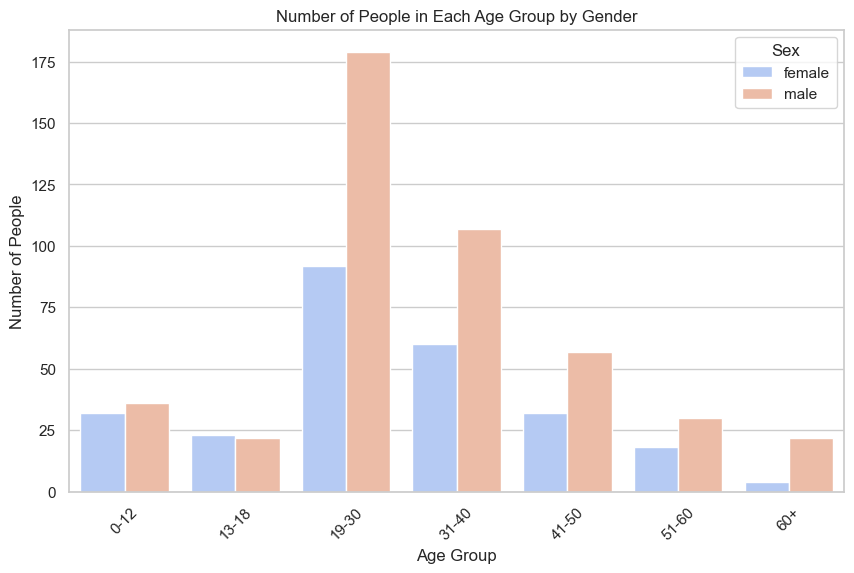

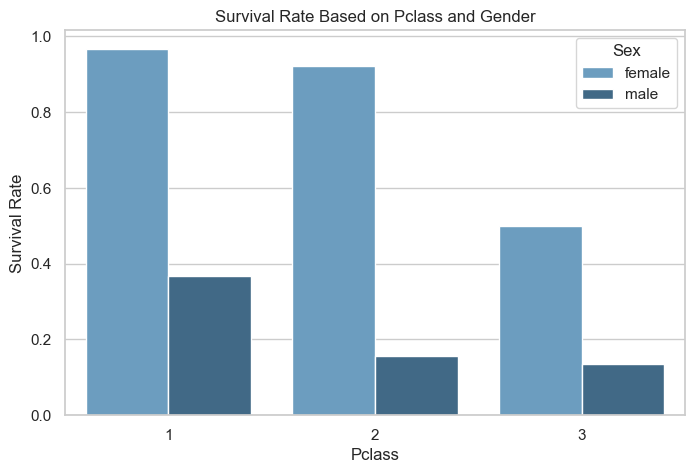

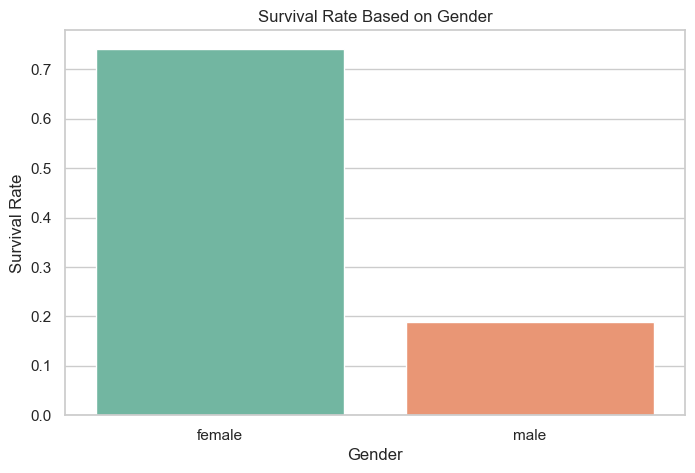

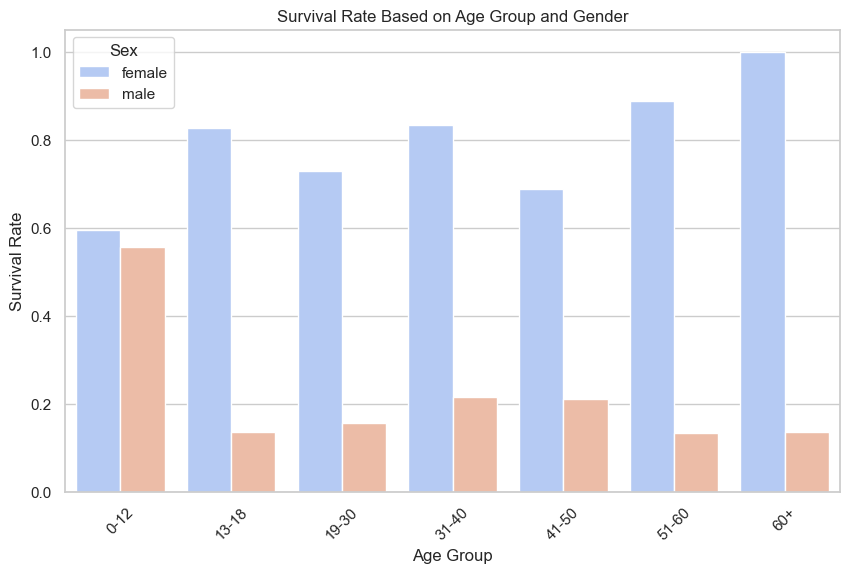

In [135]:
# Set plot style
sns.set(style="whitegrid")

# 1. Plot the number of people in each age group
# Calculate the count of people in each Age Group and Sex, with observed=False
age_group_counts_gender = titanic.groupby(['Age Group', 'Sex'], observed=False).size().reset_index(name='Count')

# Plot the number of people in each Age Group by Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Count', hue='Sex', data=age_group_counts_gender, palette='coolwarm')

# Add title and labels
plt.title('Number of People in Each Age Group by Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of People')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

# 2. Plot the survival rate based on Pclass
# Calculate survival rate based on both Pclass and Gender
survival_rate_by_class_gender = titanic.groupby(['Pclass', 'Sex'], observed=False)['Survived'].mean().reset_index()

# Plot the survival rate based on Pclass and Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=survival_rate_by_class_gender, palette='Blues_d')

# Add title and labels
plt.title('Survival Rate Based on Pclass and Gender')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

# 3. Plot the survival rate based on Sex
survival_rate_by_gender = titanic.groupby('Sex', observed=False)['Survived'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=survival_rate_by_gender, hue='Sex', palette='Set2', legend=False)
plt.title('Survival Rate Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

# 4. Plot the survival rate based on Age Group
# Calculate survival rate based on Age Group and Sex
survival_rate_by_age_gender = titanic.groupby(['Age Group', 'Sex'], observed=False)['Survived'].mean().reset_index()

# Plot the survival rate based on Age Group and Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Survived', data=survival_rate_by_age_gender, hue='Sex', palette='coolwarm')

# Add title and labels
plt.title('Survival Rate Based on Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



Number of outliers: 11
      Age
33   66.0
54   65.0
96   71.0
116  70.5
280  65.0
456  65.0
493  71.0
630  80.0
672  70.0
745  70.0
851  74.0


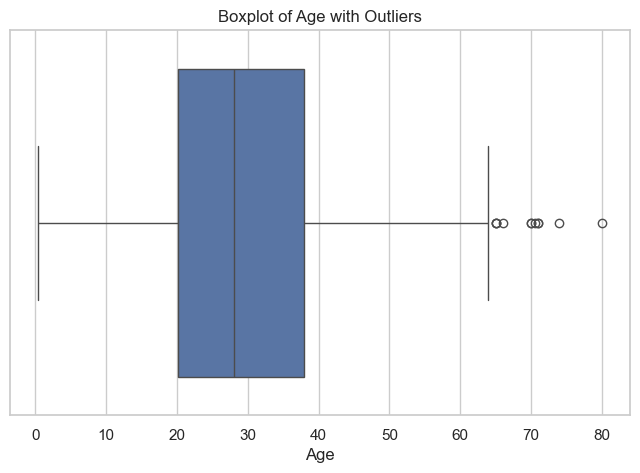

In [136]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = titanic['Age'].quantile(0.25)
Q3 = titanic['Age'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = titanic[(titanic['Age'] < lower_bound) | (titanic['Age'] > upper_bound)]

# Print the number of outliers and the outlier values
print(f"Number of outliers: {outliers.shape[0]}")
print(outliers[['Age']])

# Optionally, you can visualize the distribution of Age and highlight outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=titanic['Age'])
plt.title('Boxplot of Age with Outliers')
plt.show()

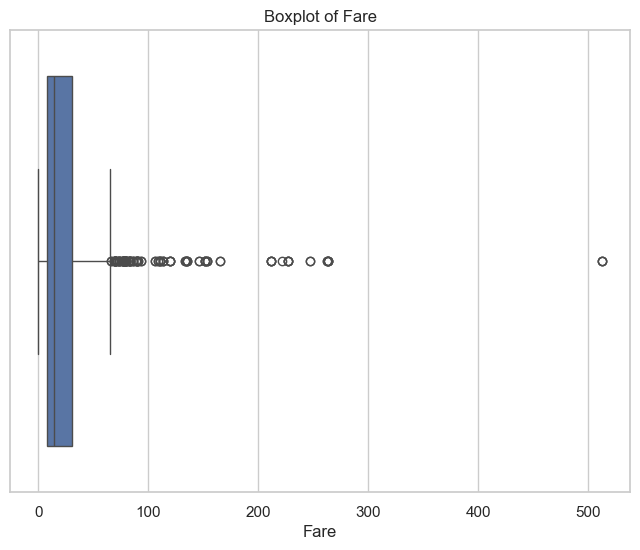

In [142]:
# Create a boxplot for the 'Fare' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=titanic['Fare'])

# Add a title and labels
plt.title('Boxplot of Fare')
plt.xlabel('Fare')

# Show the plot
plt.show()

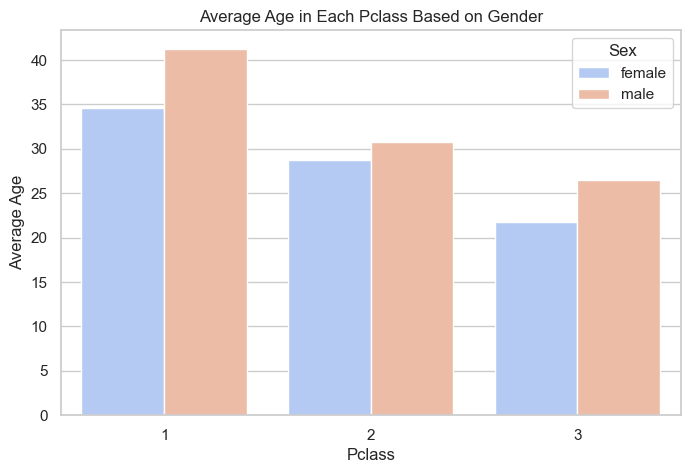

In [137]:
# Calculate the average age in each Pclass based on Gender, explicitly setting observed=True
avg_age_by_class_gender = titanic.groupby(['Pclass', 'Sex'], observed=True)['Age'].mean().reset_index()

# Plot the average age in each Pclass based on Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Age', hue='Sex', data=avg_age_by_class_gender, palette='coolwarm')

# Add title and labels
plt.title('Average Age in Each Pclass Based on Gender')
plt.xlabel('Pclass')
plt.ylabel('Average Age')
plt.show()


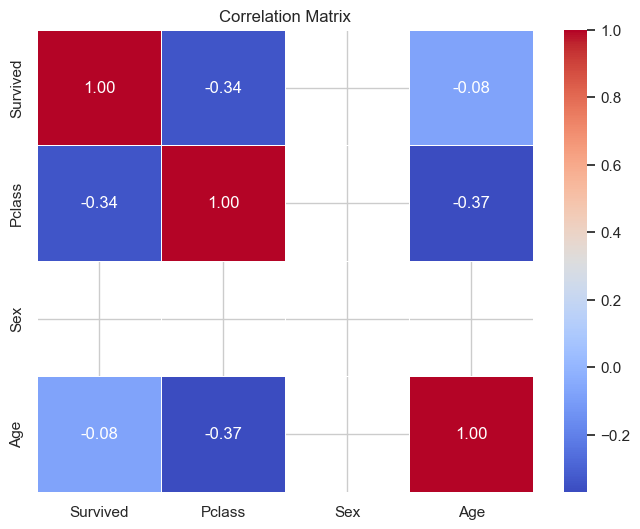

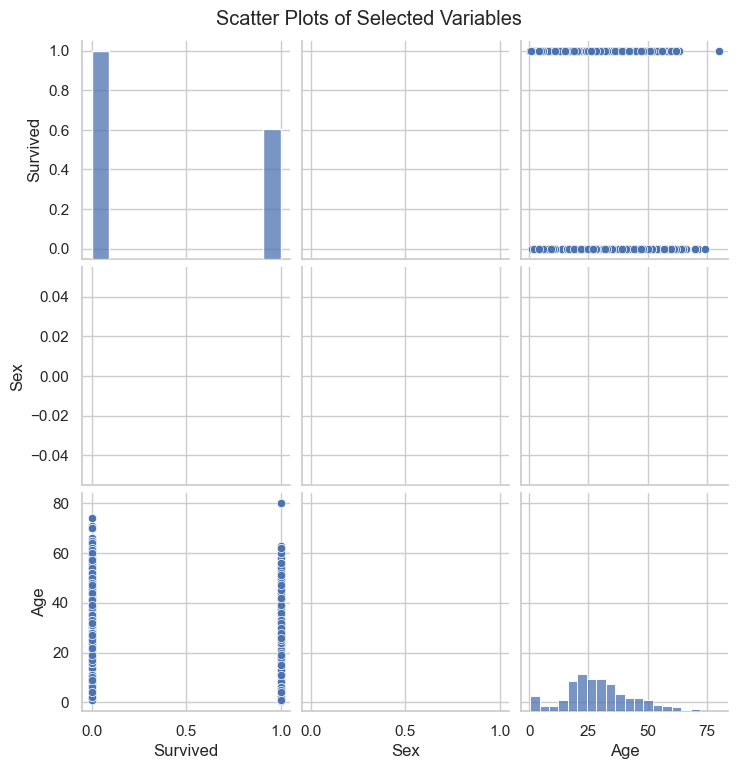

In [139]:
# Convert 'Sex' column to numeric values for correlation
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})  # 'male' becomes 0 and 'female' becomes 1

# Select relevant columns for correlation
columns_for_corr = ['Survived', 'Pclass', 'Sex', 'Age']

# Compute the correlation matrix
corr_matrix = titanic[columns_for_corr].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Plot scatter plots for numerical columns
sns.pairplot(titanic[columns_for_corr])
plt.suptitle("Scatter Plots of Selected Variables", y=1.02)
plt.show()